In [ ]:
# import
import numpy as np
import pandas as pd
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


# plotting stuff
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Loading Data and Stats



In [ ]:
train_data = pd.read_csv('data/train.csv')
features = features=[c for c in train_data.columns if "feature" in c]
test_data = pd.read_csv('data/test.csv')

In [ ]:
print("{0}Number of rows in train data: {1}{2}\n{0}Number of columns in train data: {1}{3}".format(y_,r_,train_data.shape[0],train_data.shape[1]))
print("{0}Number of rows in test data: {1}{2}\n{0}Number of columns in test data: {1}{3}".format(m_,r_,test_data.shape[0],test_data.shape[1]))
print("{0}Number of rows in features data: {1}{2}\n{0}Number of columns in features data: {1}{3}".format(b_,r_,features.shape[0],features.shape[1]))


Number of rows in train data: 2390491
Number of columns in train data: 138
Number of rows in test data: 15219
Number of columns in test data: 133
Number of rows in features data: 130
Number of columns in features data: 30


In [ ]:
train_data.head()

date     weight    resp_1    resp_2    resp_3    resp_4      resp  \
0     0   0.000000  0.009916  0.014079  0.008773  0.001390  0.006270   
1     0  16.673515 -0.002828 -0.003226 -0.007319 -0.011114 -0.009792   
2     0   0.000000  0.025134  0.027607  0.033406  0.034380  0.023970   
3     0   0.000000 -0.004730 -0.003273 -0.000461 -0.000476 -0.003200   
4     0   0.138531  0.001252  0.002165 -0.001215 -0.006219 -0.002604   

   feature_0  feature_1  feature_2  ...  feature_121  feature_122  \
0          1  -1.872746  -2.191242  ...          NaN     1.168391   
1         -1  -1.349537  -1.704709  ...          NaN    -1.178850   
2         -1   0.812780  -0.256156  ...          NaN     6.115747   
3         -1   1.174378   0.344640  ...          NaN     2.838853   
4          1  -3.172026  -3.093182  ...          NaN     0.344850   

   feature_123  feature_124  feature_125  feature_126  feature_127  \
0     8.313583     1.782433    14.018213     2.653056    12.600292   
1     1.777472    -0.915458     2.831612    -1.417010     2.297459   
2     9.667908     5.542871    11.671595     7.281757    10.060014   
3     0.499251     3.033732     1.513488     4.397532     1.266037   
4     4.101145     0.614252     6.623456     0.800129     5.233243   

   feature_128  feature_129  ts_id  
0     2.301488    11.445807      0  
1    -1.304614     1.898684      1  
2     6.638248     9.427299      2  
3     3.856384     1.013469      3  
4     0.362636     3.926633      4  

[5 rows x 138 columns]

In [ ]:
features.head()

feature  tag_0  tag_1  tag_2  tag_3  tag_4  tag_5  tag_6  tag_7  tag_8  \
0  feature_0  False  False  False  False  False  False  False  False  False   
1  feature_1  False  False  False  False  False  False   True   True  False   
2  feature_2  False  False  False  False  False  False   True   True  False   
3  feature_3  False  False  False  False  False  False   True  False   True   
4  feature_4  False  False  False  False  False  False   True  False   True   

   ...  tag_19  tag_20  tag_21  tag_22  tag_23  tag_24  tag_25  tag_26  \
0  ...   False   False   False   False   False   False   False   False   
1  ...   False   False   False   False   False   False   False   False   
2  ...   False   False   False   False   False   False   False   False   
3  ...   False   False   False   False   False   False   False   False   
4  ...   False   False   False   False   False   False   False   False   

   tag_27  tag_28  
0   False   False  
1   False   False  
2   False   False  
3   False   False  
4   False   False  

[5 rows x 30 columns]

In [ ]:
test_data.head()

weight  feature_0  feature_1  feature_2  feature_3  feature_4  \
0   0.000000          1  -1.872746  -2.191242  -0.474163  -0.323046   
1  16.673515         -1  -1.349537  -1.704709   0.068058   0.028432   
2   0.000000         -1   0.812780  -0.256156   0.806463   0.400221   
3   0.000000         -1   1.174378   0.344640   0.066872   0.009357   
4   0.138531          1  -3.172026  -3.093182  -0.161518  -0.128149   

   feature_5  feature_6  feature_7  feature_8  ...  feature_122  feature_123  \
0   0.014688  -0.002484        NaN        NaN  ...     1.168391     8.313583   
1   0.193794   0.138212        NaN        NaN  ...    -1.178850     1.777472   
2  -0.614188  -0.354800        NaN        NaN  ...     6.115747     9.667908   
3  -1.006373  -0.676458        NaN        NaN  ...     2.838853     0.499251   
4  -0.195006  -0.143780        NaN        NaN  ...     0.344850     4.101145   

   feature_124  feature_125  feature_126  feature_127  feature_128  \
0     1.782433    14.018213     2.653056    12.600292     2.301488   
1    -0.915458     2.831612    -1.417010     2.297459    -1.304614   
2     5.542871    11.671595     7.281757    10.060014     6.638248   
3     3.033732     1.513488     4.397532     1.266037     3.856384   
4     0.614252     6.623456     0.800129     5.233243     0.362636   

   feature_129  date  ts_id  
0    11.445807     0      0  
1     1.898684     0      1  
2     9.427299     0      2  
3     1.013469     0      3  
4     3.926633     0      4  

[5 rows x 133 columns]

In [ ]:
org_len = len(train_data)
train_data.feature_0 = train_data.feature_0.astype(np.int8)
train_data.date= train_data.date.astype(np.int16)
train_data.ts_id = train_data.ts_id.astype(np.int32)

for i in train_data:
    if train_data[i].dtype == np.float64:
        if (((train_data[i] < .0001) & (train_data[i] > -.0001)).mean()) > .001:
            print(i)
for i in train_data:
    if train_data[i].dtype == np.float64:
        if (((train_data[i] < .0001) & (train_data[i] > -.0001)).mean()) < .001:
            train_data[i] = train_data[i].astype(np.float32)

remove values


There are a total of 500 days of data in `train.csv`. Let us take a look at the cumulative values of `resp` over time

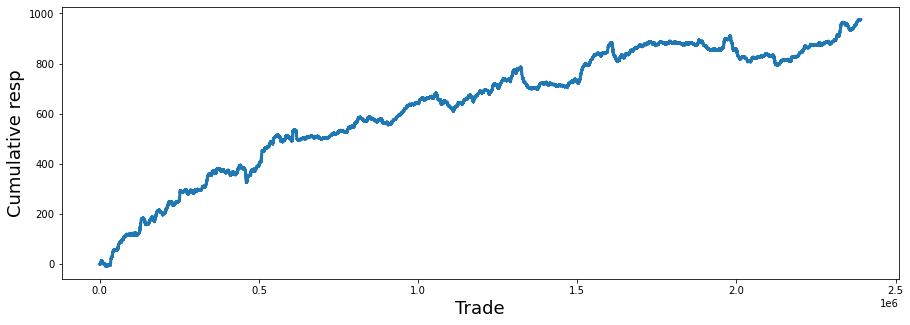

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))
balance= pd.Series(train_data['resp']).cumsum()
ax.set_xlabel ("Trade", fontsize=18)
ax.set_ylabel ("Cumulative resp", fontsize=18);
balance.plot(lw=3);
del balance
gc.collect();



The target of this competition is the `action`: 1 to make the trade and 0 to pass on it. In view of this let us add a new 'binary' column to our test dataset called `action` such that if `resp` is positive then `action=1` else `action=0`, *i.e.*

In [49]:
train_data['action'] = ((train_data['resp'])>0)*1

Let us now compare the overall action to inaction

In [50]:
train_data['action'].value_counts()

1    1204974
0    1185517
Name: action, dtype: int64

we can see that with the above formula overall we are very slightly more proactive (0.4%) than inactive. How does this look daily?

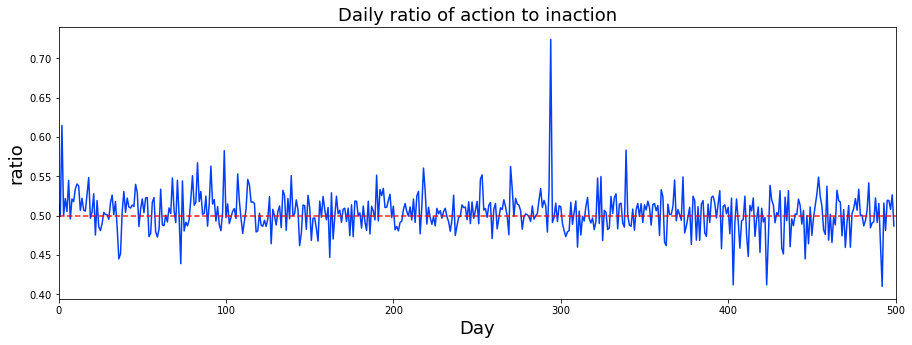

In [51]:
daily_action_sum   = train_data['action'].groupby(train_data['date']).sum()
daily_action_count = train_data['action'].groupby(train_data['date']).count()
daily_ratio        = daily_action_sum/daily_action_count
# now plot
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(daily_ratio)
ax.set_xlabel ("Day", fontsize=18)
ax.set_ylabel ("ratio", fontsize=18)
ax.set_title ("Daily ratio of action to inaction", fontsize=18)
plt.axhline(0.5, linestyle='--', alpha=0.85, c='r');
ax.set_xlim(xmin=0)
ax.set_xlim(xmax=500)
plt.show();

no obvious weekly/monthly/seasonal changes.

In [52]:
daily_ratio_mean = daily_ratio.mean()
print('The mean daily ratio is %.3f' % daily_ratio_mean)

The mean daily ratio is 0.504


In [53]:
daily_ratio_max = daily_ratio.max()
print('The maximum daily ratio is %.3f' % daily_ratio_max)

The maximum daily ratio is 0.724


### Pairplot for highly related features

<Figure size 720x720 with 0 Axes>

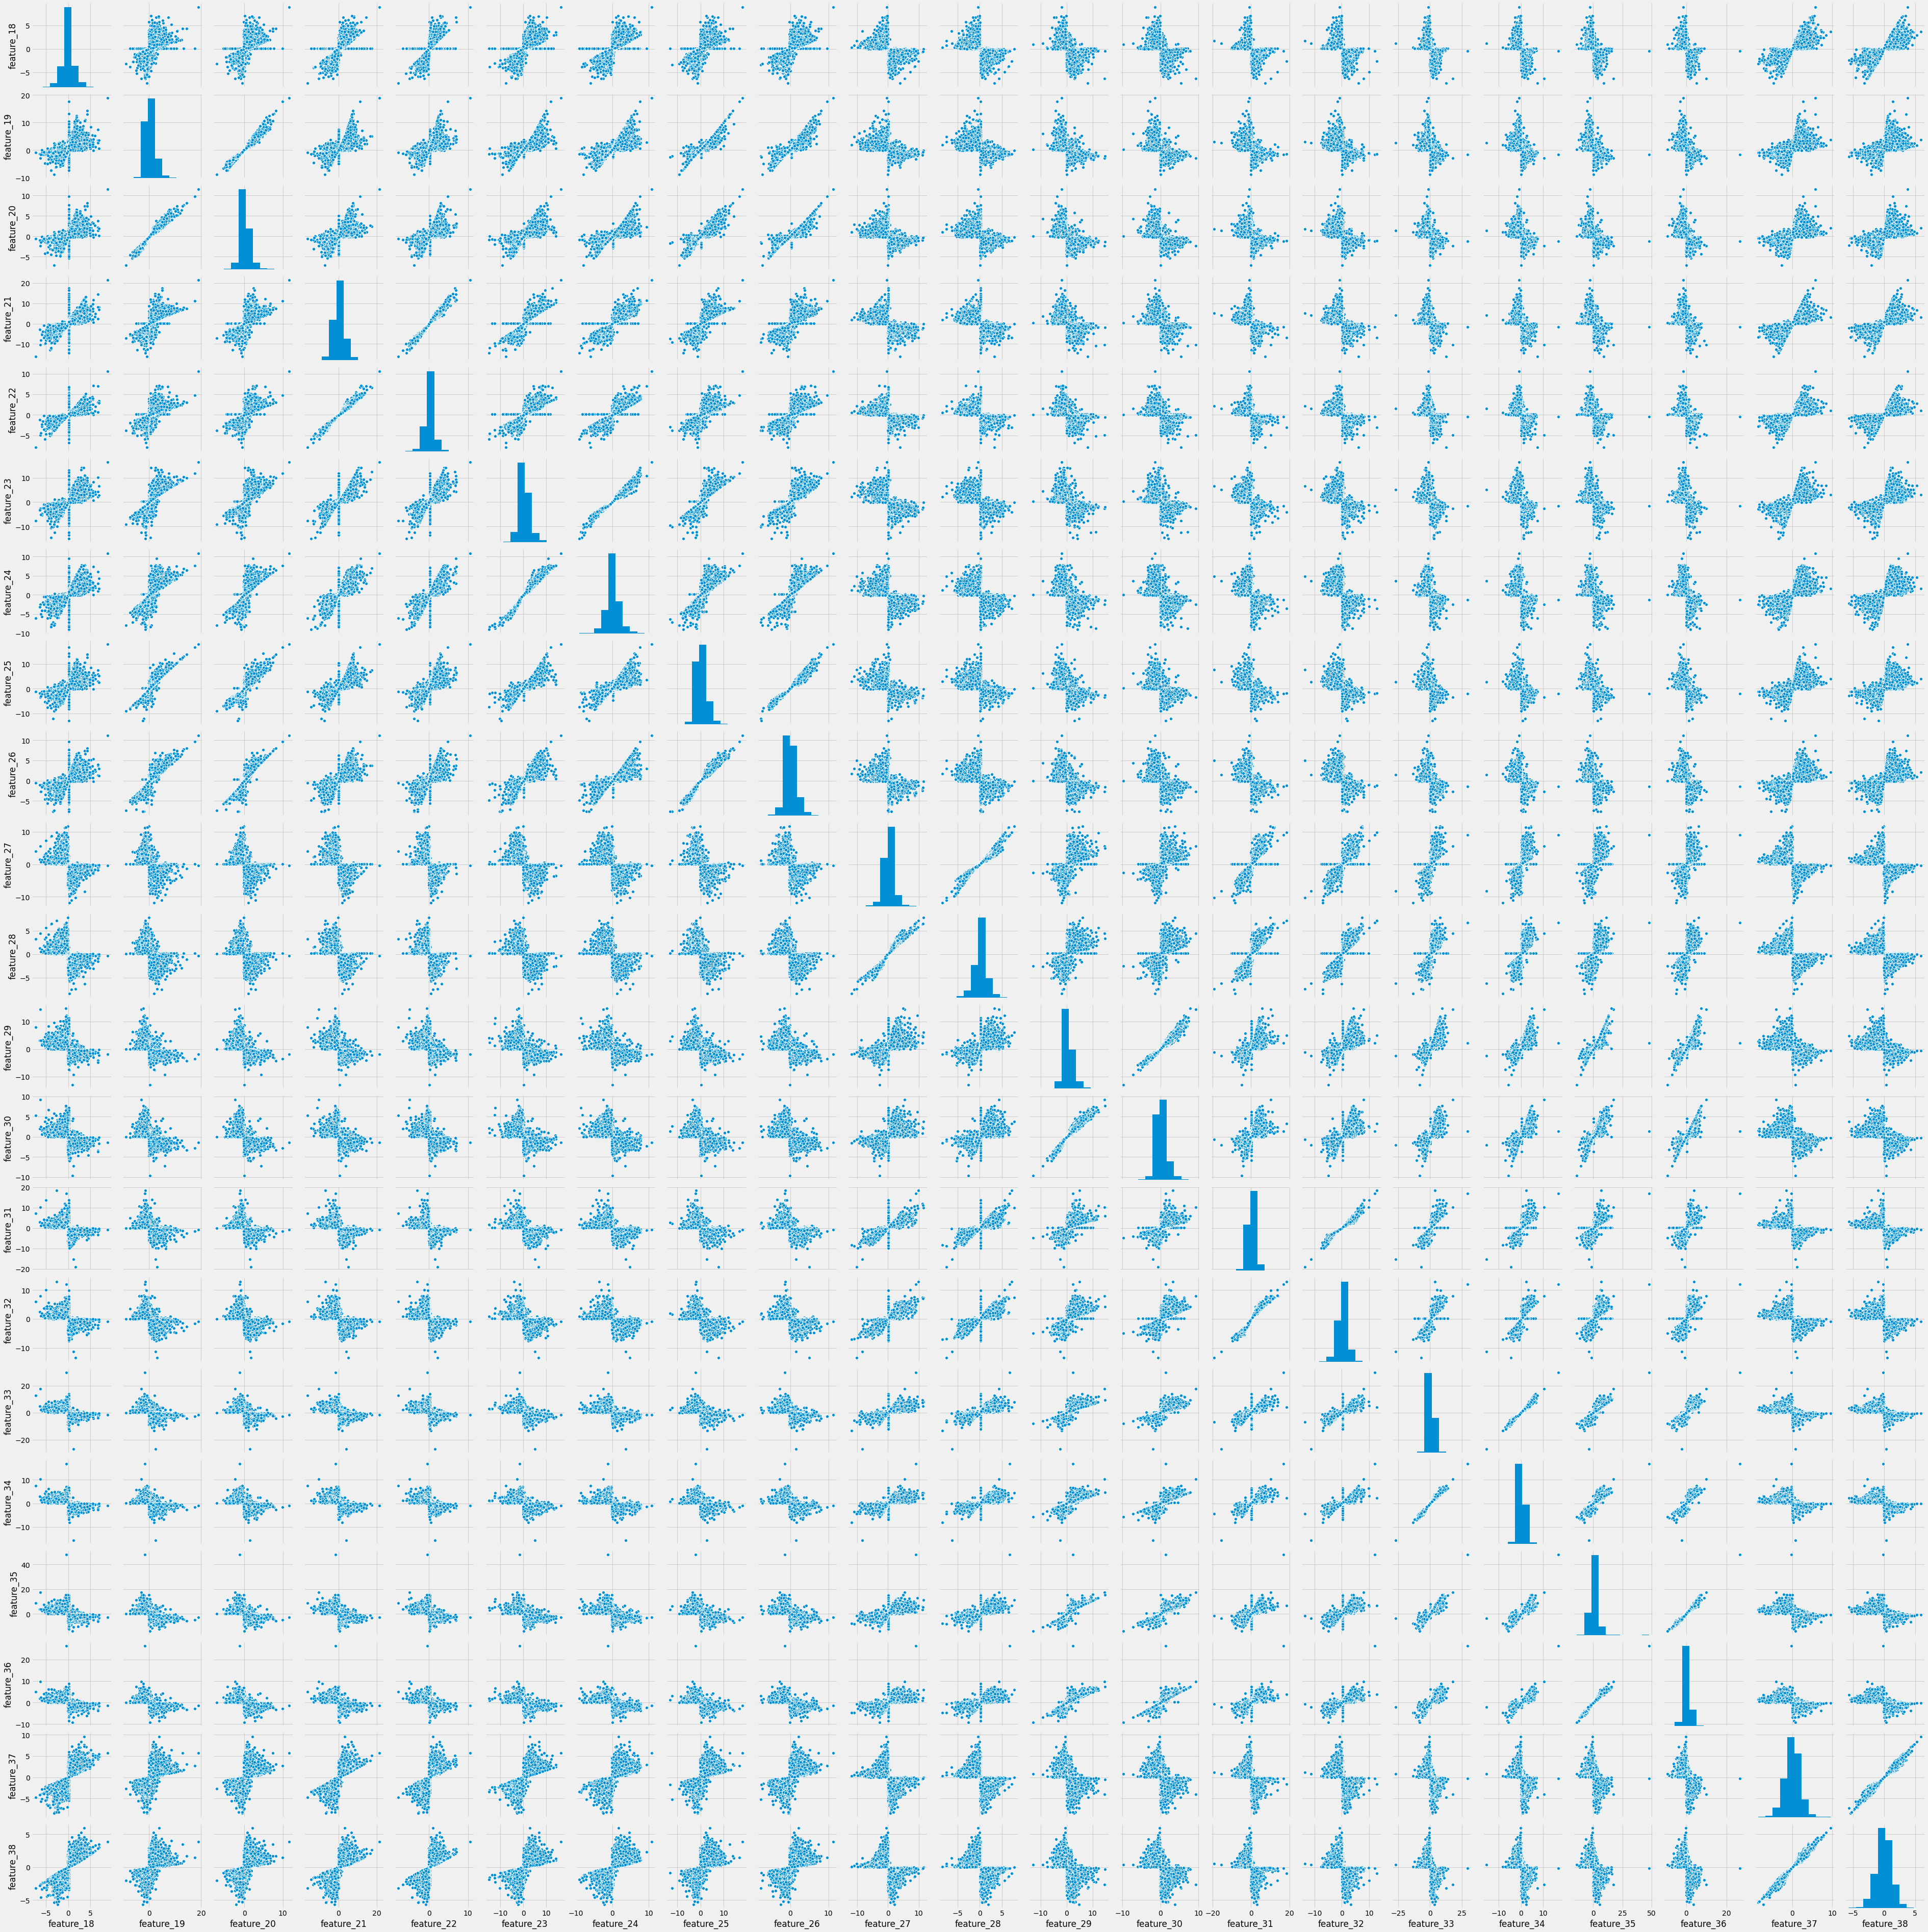

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(train_data.loc[:10000,[f"feature_{x}" for x in range(18,39)]]);

## Missing Data





Now let us look at the sum of the number of missing data in each column for the whole `train.csv` file:

In [59]:
#missing_data = pd.DataFrame(train_data.isna().sum().sort_values(ascending=False),columns=['Total missing'])
#missing_data.T

gone = train_data.isnull().sum()
px.bar(gone, color=gone.values, title="Total number of missing values for each column").show()

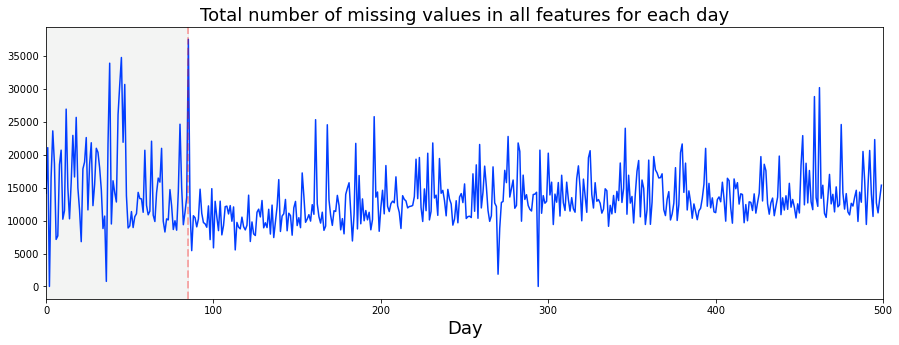

In [60]:
missing_features = train_data.iloc[:,7:137].isnull().sum(axis=1).groupby(train_data['date']).sum().to_frame()
# now make a plot
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(missing_features)
ax.set_xlabel ("Day", fontsize=18)
ax.set_title ("Total number of missing values in all features for each day", fontsize=18)
ax.axvline(x=85, linestyle='--', alpha=0.3, c='red', lw=2)
ax.axvspan(0,  85, color=sns.xkcd_rgb['grey'], alpha=0.1)
ax.set_xlim(xmin=0)
ax.set_xlim(xmax=500)
plt.show()

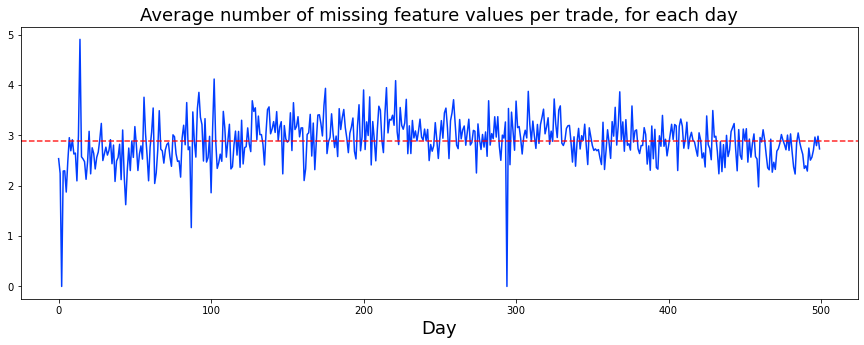

In [61]:
count_weights    = train_data[['date', 'weight']].groupby('date').agg(['count'])
result = pd.merge(count_weights, missing_features, on = "date", how = "inner")
result.columns = ['weights','missing']
result['ratio'] = result['missing']/result['weights']
missing_per_trade = result['ratio'].mean()

# now make a plot
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(result['ratio'])
plt.axhline(missing_per_trade, linestyle='--', alpha=0.85, c='r');
ax.set_xlabel ("Day", fontsize=18)
ax.set_title ("Average number of missing feature values per trade, for each day", fontsize=18)
plt.show()

## Preprocess Data

In [ ]:
df=train_data
df=df[df['weight'] != 0]
df=df.query('date>85').reset_index(drop=True)
null=df.isnull().sum()
null_list= list(null[null>.1*(len(df))].index)
feature_removed=df.drop(columns=null_list)

f_mean = np.mean(df[features[1:]].values,axis=0)
resp_cols = ['resp_1', 'resp_2', 'resp_3', 'resp', 'resp_4']


In [ ]:

learning_rate=1e-3
window_size=10
batch_size=4096
shuffle_buffer= 1000
SEED = 1111
np.random.seed(SEED)
tf.keras.backend.clear_session()
tf.random.set_seed(SEED)


In [ ]:
def dataset(df,batch_size):
    x_train = df.loc[:, df.columns.str.contains('feature')]
    y_train = np.stack([(df[c] > 0).astype('int') for c in resp_cols]).T
    y_train = pd.DataFrame(y_train)
    x_train = x_train.values.reshape((x_train.shape[0], 1, x_train.shape[1]))
    y_train = y_train.values.reshape((y_train.shape[0], 1, y_train.shape[1]))
    dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
    return dataset


In [ ]:
dataset = dataset(df,batch_size)
y_train = np.stack([(df[c] > 0).astype('int') for c in resp_cols]).T


## Create Model

In [ ]:
def model_f(features,learning_rate ):
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=5,strides=1, padding="causal",activation="relu",input_shape=(None,features)),)
    #lstm

    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
    
    #dense
    model.add(tf.keras.layers.Dense(512,"relu"))
    model.add(tf.keras.layers.Dropout(.2))
    model.add(tf.keras.layers.Dense(394,"relu"))
    model.add(tf.keras.layers.Dropout(.2))

    #out
    model.add(tf.keras.layers.Dense(1))
    model.compile(tf.keras.optimizers.Adam(learning_rate =learning_rate),loss=tf.keras.losses.Huber(), metrics = ["mae"] )
    
    
    
    return model


In [ ]:
model=model_f(features,learning_rate)
model.fit(dataset,epochs=50)

Epoch 1/50
15/15 [==============================] - 8s 15ms/step - loss: 1.9769e-06 - mae: 0.0014
Epoch 2/50
15/15 [==============================] - 0s 12ms/step - loss: 3.0234e-06 - mae: 0.0015
Epoch 3/50
15/15 [==============================] - 0s 12ms/step - loss: 2.6610e-06 - mae: 0.0015
Epoch 4/50
15/15 [==============================] - 0s 12ms/step - loss: 1.9262e-06 - mae: 0.0013 ETA: 0s - loss: 1.8312e-06 - mae: 0.001
Epoch 5/50
15/15 [==============================] - 0s 12ms/step - loss: 1.7441e-06 - mae: 0.0013
Epoch 6/50
15/15 [==============================] - 0s 12ms/step - loss: 2.1886e-06 - mae: 0.0013
Epoch 7/50
15/15 [==============================] - 0s 13ms/step - loss: 2.1520e-06 - mae: 0.0014
Epoch 8/50
15/15 [==============================] - 0s 12ms/step - loss: 2.2701e-06 - mae: 0.0014
Epoch 9/50
15/15 [==============================] - 0s 12ms/step - loss: 1.8830e-06 - mae: 0.0014
Epoch 10/50
15/15 [==============================] - 0s 12ms/step - loss: 2.26

## Make Prediction

In [ ]:

    prediction = 0
    prediction += model.predict(test_data[features])[0]
    
    prediction = prediction > 0.5
    submission.action = prediction.astype(int)
   

CPU times: user 10min 40s, sys: 9.09 s, total: 10min 49s
Wall time: 5min 26s


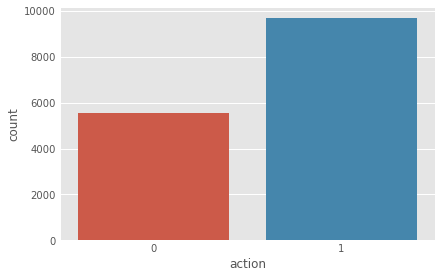

In [ ]:
sns.countplot(submission.action);